### Simultaneous Fit in RooFit

We start creating the model

In [1]:
using namespace RooFit; 
RooFitResult * r = nullptr; 

RooWorkspace w("w"); 
w.factory("Exponential:bkg1_pdf(x[0,10], a1[-0.5,-2,-0.2])");
w.factory("Gaussian:sig_pdf(x, mass[2], sigma[0.3])");
   
w.factory("prod:nsig1(mu[1,0,5],xsec1[50])");

w.factory("SUM:model1(nsig1*sig_pdf, nbkg1[1000,0,10000]*bkg1_pdf)");  // for extended model

w.factory("Exponential:bkg2_pdf(x, a2[-0.25,-2,-0.2])");

w.factory("prod:nsig2(mu,xsec2[30])");
w.factory("SUM:model2(nsig2*sig_pdf, nbkg2[100,0,10000]*bkg2_pdf)");  // for extended model

// Create discrete observable to label channels
w.factory("index[channel1,channel2]");

// Create joint pdf (RooSimultaneous)
w.factory("SIMUL:jointModel(index,channel1=model1,channel2=model2)");

RooAbsPdf * pdf = w.pdf("jointModel");
RooRealVar * x = w.var("x");  // the observable
RooCategory * catIndex = w.cat("index");  // the category



RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Generate the data using the model PDF

In [2]:
 // use fixed random numbers for reproducibility
   // use 0 for changing every time
RooRandom::randomGenerator()->SetSeed(111);
   // generate binned 
   // plot the generate data in 50 bins (default is 100) 
x->setBins(50);

   // generate events of joint model 
   // NB need to add also category as observable
RooDataSet * data = pdf->generate( RooArgSet(*x,*catIndex));  // will generate accordint to total S+B events
data->SetName("data");
w.import(*data);

data->Print(); 


[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing dataset data
RooDataSet::data[x,index] = 1180 entries


Plot the data

In [3]:
RooPlot * plot1 = x->frame(RooFit::Title("Channel 1"));
RooPlot * plot2 = x->frame(RooFit::Title("Channel 2"));
data->plotOn(plot1,RooFit::Cut("index==index::channel1"));
data->plotOn(plot2,RooFit::Cut("index==index::channel2"));
// plot in a Canvas
TCanvas * c1 = new TCanvas();
c1->Divide(1,2);
c1->cd(1); plot1->Draw(); 
c1->cd(2); plot2->Draw();

[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 1041 events out of 1180 total events
[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 139 events out of 1180 total events


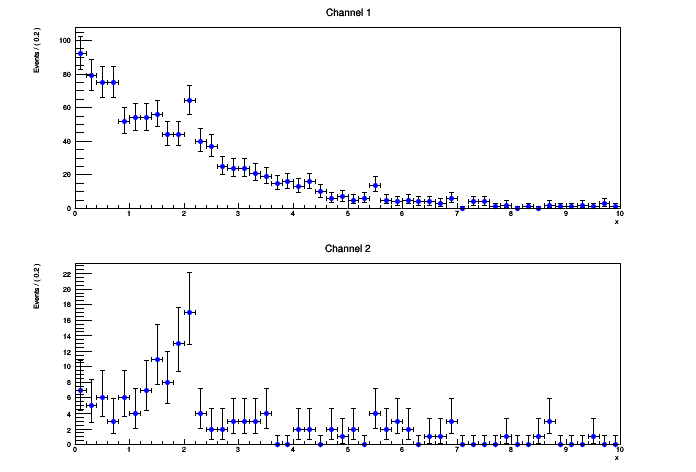

In [7]:
c1->Draw();

Fit and display the result

In [14]:
r = pdf->fitTo(*data, RooFit::Save(true), RooFit::Minimizer("Minuit2","Migrad"));
r->Print();

pdf->plotOn(plot1,RooFit::ProjWData(*data),RooFit::Slice(*w.cat("index"),"channel1"));
pdf->plotOn(plot2,RooFit::ProjWData(*data),RooFit::Slice(*w.cat("index"),"channel2"));
  //draw the two separate pdf's
pdf->paramOn(plot1,RooFit::Layout(0.55,0.85,0.85),RooFit::Parameters(RooArgSet(*w.var("a1"),*w.var("nbkg1"))));
pdf->paramOn(plot2,RooFit::Layout(0.55,0.85,0.85),RooFit::Parameters(RooArgSet(*w.var("a2"),*w.var("nbkg2"))));
pdf->paramOn(plot2,RooFit::Layout(0.55,0.85,0.7),RooFit::Parameters(RooArgSet(*w.var("mu"))));

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
RooAbsTestStatistic::initSimMode: creating slave calculator #0 for state channel1 (1041 dataset entries)
RooAbsTestStatistic::initSimMode: creating slave calculator #1 for state channel2 (139 dataset entries)
[#1] INFO:Fitting -- RooAbsTestStatistic::initSimMode: created 2 slave calculators.
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (sig_pdf)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (bkg1_pdf)
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (sig_pdf)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (bkg2_pdf)
Minuit2Minimizer: Minimize with max-calls 25

Info in <Minuit2>: Minuit2Minimizer::Hesse : Hesse is valid - matrix is accurate


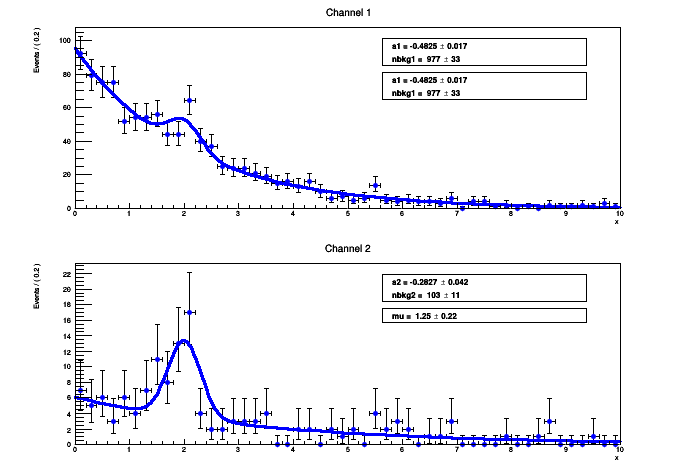

In [15]:
c1->cd(1); plot1->Draw(); 
c1->cd(2); plot2->Draw();
c1->Draw();